### 💜 This notebook is used to evaluate and experiment with a new YOLO architecure to improve underwater object detection in SCTLD.

In [ ]:
import sys
!{sys.executable} -m pip install ultralytics shapely torch lap boto3 dotenv --force-reinstall --no-cache-dir

In [27]:
# import custom modules for image preprocessing and yolo predictions
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))
import modules.img_preprocessing as imgp
import modules.yolo_preprocessing as yp


In [28]:
# import the general modules
from ultralytics import YOLO  
import torch
import cv2
import matplotlib.pyplot as plt

In [29]:
# import the coral detection model
model = YOLO("../../../models/YOLO_models/1_ver/best.pt")
model.info()

Model summary: 129 layers, 11,135,987 parameters, 0 gradients, 28.6 GFLOPs


(129, 11135987, 0, 28.6469632)

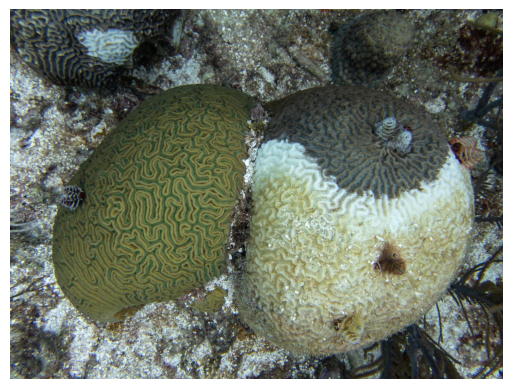

In [30]:
# generate heatmaps from the original model to see whats going on
from ultralytics.solutions import heatmap
image = cv2.imread("../../../../../../CB_testdata/CB_testdata/cchock_threat-reef04.jpg")
from matplotlib import pyplot as plt

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off') 
plt.show()



0: 480x640 4 Corals, 89.7ms
Speed: 2.4ms preprocess, 89.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


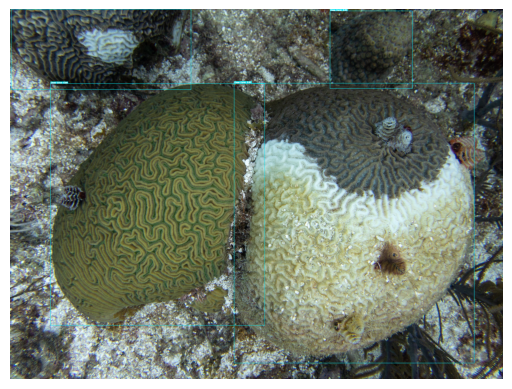

In [31]:
# generate heatmaps from the original model to see whats going on
from ultralytics.solutions import heatmap
from matplotlib import pyplot as plt

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
prediction_image = yp.draw_prediction_yolo(model, image_rgb)
prediction_image = cv2.cvtColor(prediction_image, cv2.COLOR_BGR2RGB)
plt.imshow(prediction_image)
plt.axis('off') 
plt.show()


Ultralytics Solutions:  {'source': None, 'model': '../../../models/YOLO_models/1_ver/best.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': None, 'colormap': 4, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': False, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}

0: 480x640 4 Corals, 114.9ms
Speed: 2.5ms preprocess, 114.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


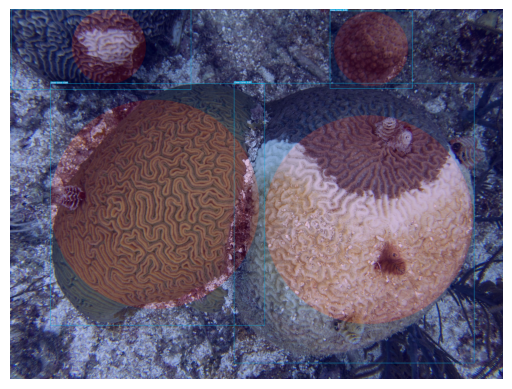

In [33]:
from ultralytics.solutions import Heatmap
heatmap = Heatmapheatmap = Heatmap(
    model="../../../models/YOLO_models/1_ver/best.pt",
    colormap=cv2.COLORMAP_RAINBOW, 
)
results = heatmap.process(image_rgb)
blended = cv2.addWeighted(image_rgb, 0.6, results.plot_im, 0.3, 0)
plt.imshow(blended)
plt.axis('off') 
plt.show()
